In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
features = ['loan_amnt', 'annual_inc', 'term', 'emp_length', 'loan_status']
full_data = pd.read_csv('accepted_2007_to_2018Q4.csv', usecols = features)
data = full_data.query("loan_status in ('Fully Paid', 'Charged Off')").copy()
data = data.dropna()
print(data)

      loan_amnt        term emp_length  annual_inc loan_status
0        3600.0   36 months  10+ years     55000.0  Fully Paid
1       24700.0   36 months  10+ years     65000.0  Fully Paid
2       20000.0   60 months  10+ years     63000.0  Fully Paid
4       10400.0   60 months    3 years    104433.0  Fully Paid
5       11950.0   36 months    4 years     34000.0  Fully Paid
...         ...         ...        ...         ...         ...
2792     8000.0   36 months    4 years     95000.0  Fully Paid
2793     8000.0   36 months    5 years    125000.0  Fully Paid
2794    11500.0   36 months    3 years     32000.0  Fully Paid
2795    18025.0   36 months   < 1 year     48000.0  Fully Paid
2796     9400.0   36 months  10+ years    100000.0  Fully Paid

[2361 rows x 5 columns]


In [ ]:
data['loan_status'] = data['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
data['term'] = data['term'].replace({' 36 months': 36, ' 60 months': 60})
data['emp_length'] = data['emp_length'].map(lambda x: x.split(' ')[0])
data['emp_length'] = data['emp_length'].map(lambda x: str(x).replace('+', '').replace('<', '0'))
print(data)

      loan_amnt  term emp_length  annual_inc  loan_status
0        3600.0    36         10     55000.0            1
1       24700.0    36         10     65000.0            1
2       20000.0    60         10     63000.0            1
4       10400.0    60          3    104433.0            1
5       11950.0    36          4     34000.0            1
...         ...   ...        ...         ...          ...
2792     8000.0    36          4     95000.0            1
2793     8000.0    36          5    125000.0            1
2794    11500.0    36          3     32000.0            1
2795    18025.0    36          0     48000.0            1
2796     9400.0    36         10    100000.0            1

[2361 rows x 5 columns]


In [ ]:
X = list(data.columns)
X.remove('loan_status')
Y = 'loan_status'
X_train, X_test, y_train, y_test = train_test_split(data[X], data[Y], test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
preds_valid=model.predict(X_test)
accuracy_valib = accuracy_score(y_test, list(map(lambda x: 1 if x > 0.7 else 0, preds_valid)))
score_valid = mean_absolute_error(y_test,preds_valid)

print("Accuracy: ",accuracy_valib)
print("MAE: ",score_valid)

Accuracy:  0.6871035940803383
MAE:  0.2703496426054566


ROC-AUC-score:  0.5990990990990992


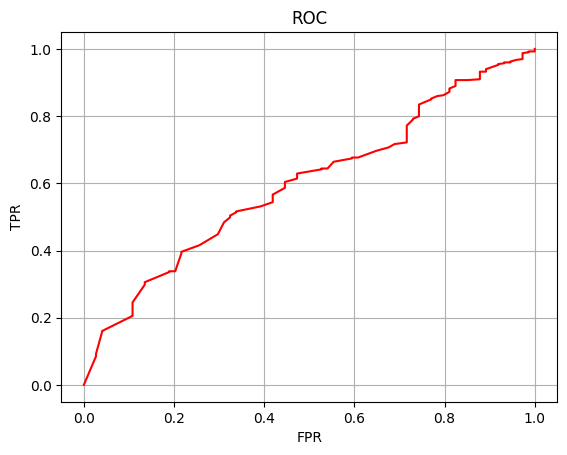

In [ ]:
fpr, tpr, tresholds = roc_curve(y_test, preds_valid)
plt.plot(fpr, tpr, color='red')
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

print('ROC-AUC-score: ', roc_auc_score(y_test, preds_valid))